In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("./Data For Project/train_data.csv")
train

,Engine id,Cycle number,Operation Condition 1,Operation Condition 2,Operation Condition 3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9904,50,194,0.0037,0.0004,100.0,518.67,643.77,1604.93,1423.51,14.62,...,519.85,2388.19,8194.20,8.5043,0.03,396,2388,100.0,38.42,23.0543
9905,50,195,0.0019,-0.0004,100.0,518.67,643.33,1605.31,1434.87,14.62,...,519.33,2388.21,8200.90,8.5352,0.03,395,2388,100.0,38.45,23.0191
9906,50,196,0.0020,-0.0002,100.0,518.67,643.32,1602.26,1430.01,14.62,...,519.88,2388.17,8194.10,8.5034,0.03,395,2388,100.0,38.45,23.0379
9907,50,197,-0.0026,-0.0001,100.0,518.67,643.73,1599.94,1432.87,14.62,...,519.48,2388.20,8194.64,8.5241,0.03,397,2388,100.0,38.52,23.0832


In [4]:
train['Remaining_cycles'] = train.groupby('Engine id')['Cycle number'].transform("max") - train['Cycle number']

In [5]:
train.head()

,Engine id,Cycle number,Operation Condition 1,Operation Condition 2,Operation Condition 3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Remaining_cycles
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [6]:
forecast = pd.read_csv("./Data For Project/RUL_forecast_length.csv")
forecast

,Forecast Length,Engine id
0,86,51
1,86,52
2,78,53
3,103,54
4,78,55
5,110,56
6,55,57
7,59,58
8,93,59
9,69,60


In [7]:
train.columns

Index(['Engine id', 'Cycle number', 'Operation Condition 1',
       'Operation Condition 2', 'Operation Condition 3', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32',
       'Remaining_cycles'],
      dtype='object')

In [8]:
test= pd.read_csv("./Data For Project/test_data.csv")
test

,Engine id,Cycle number,Operation Condition 1,Operation Condition 2,Operation Condition 3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,51,1,0.0032,-0.0003,100.0,518.67,641.83,1583.55,1408.68,14.62,...,521.79,2387.99,8149.56,8.3884,0.03,391,2388,100.0,39.08,23.3214
1,51,2,-0.0011,-0.0002,100.0,518.67,642.09,1580.84,1397.69,14.62,...,522.13,2387.98,8145.73,8.3922,0.03,391,2388,100.0,38.83,23.3451
2,51,3,0.0008,-0.0004,100.0,518.67,642.49,1591.56,1398.40,14.62,...,522.27,2388.00,8142.38,8.4018,0.03,392,2388,100.0,39.18,23.3495
3,51,4,-0.0010,-0.0000,100.0,518.67,642.42,1573.22,1397.74,14.62,...,522.71,2387.99,8148.23,8.3900,0.03,393,2388,100.0,38.89,23.4847
4,51,5,0.0024,0.0003,100.0,518.67,642.08,1587.52,1388.02,14.62,...,522.14,2388.02,8147.25,8.4024,0.03,391,2388,100.0,39.05,23.4072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,100,116,0.0006,0.0000,100.0,518.67,642.36,1591.22,1407.75,14.62,...,521.41,2388.07,8145.15,8.4126,0.03,392,2388,100.0,39.05,23.3016
6408,100,117,0.0006,-0.0001,100.0,518.67,642.77,1590.85,1412.00,14.62,...,521.74,2388.13,8143.03,8.4345,0.03,394,2388,100.0,38.79,23.3007
6409,100,118,0.0018,-0.0002,100.0,518.67,642.21,1586.56,1405.31,14.62,...,521.33,2388.09,8139.82,8.4590,0.03,393,2388,100.0,38.81,23.2483
6410,100,119,0.0020,-0.0003,100.0,518.67,642.57,1588.46,1405.24,14.62,...,521.10,2388.07,8146.76,8.4512,0.03,394,2388,100.0,38.77,23.2437


In [9]:
test['max']=test.groupby('Engine id')['Cycle number'].transform("max")

In [10]:
test_f = pd.merge(test, forecast, how='left', left_on='Engine id', right_on='Engine id')

In [11]:
test_f['forecast']=test_f['max']+test_f['Forecast Length']

In [12]:
test_f['Remaining_cycles'] = test_f['forecast']-test_f['Cycle number']
test_f.head()

,Engine id,Cycle number,Operation Condition 1,Operation Condition 2,Operation Condition 3,T2,T24,T30,T50,P2,...,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,max,Forecast Length,forecast,Remaining_cycles
0,51,1,0.0032,-0.0003,100.0,518.67,641.83,1583.55,1408.68,14.62,...,0.03,391,2388,100.0,39.08,23.3214,127,86,213,212
1,51,2,-0.0011,-0.0002,100.0,518.67,642.09,1580.84,1397.69,14.62,...,0.03,391,2388,100.0,38.83,23.3451,127,86,213,211
2,51,3,0.0008,-0.0004,100.0,518.67,642.49,1591.56,1398.40,14.62,...,0.03,392,2388,100.0,39.18,23.3495,127,86,213,210
3,51,4,-0.0010,-0.0000,100.0,518.67,642.42,1573.22,1397.74,14.62,...,0.03,393,2388,100.0,38.89,23.4847,127,86,213,209
4,51,5,0.0024,0.0003,100.0,518.67,642.08,1587.52,1388.02,14.62,...,0.03,391,2388,100.0,39.05,23.4072,127,86,213,208


<Axes: >

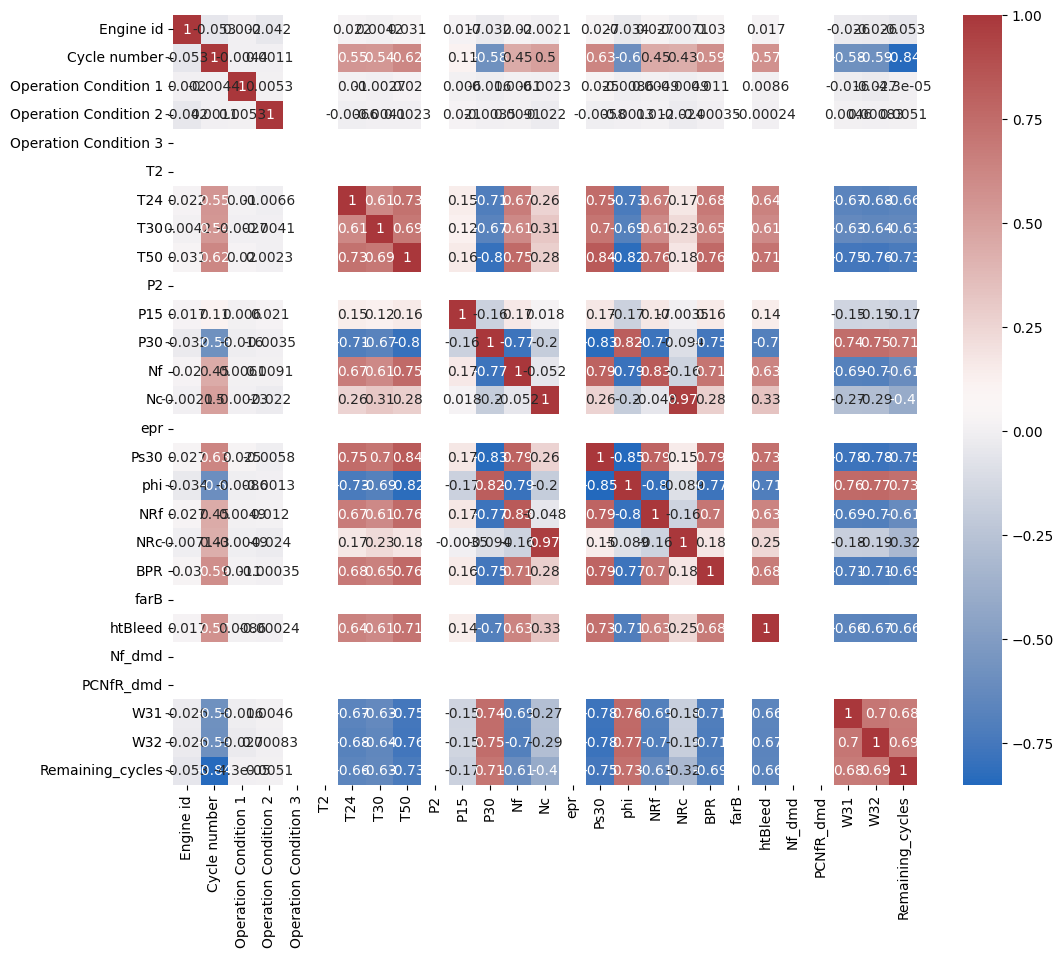

In [233]:
plt.figure(figsize=(12,10))
sns.heatmap(train
            # .drop(columns=['Cycle number'])
            .corr(), 
            cmap='vlag', 
            annot=True
            )

## Feature Selection Using PCA

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [234]:
X_t =train.drop(columns=['Remaining_cycles'])
X_t_scaled=StandardScaler().fit_transform(X_t)

In [238]:
variance=0.9
pca = PCA(variance)
X_t_pca = pca.fit_transform(X_t_scaled)

In [239]:
top_feature_indices = np.argsort(np.abs(pca.components_[0]))[::-1]

# Retrieve the corresponding feature names
top_feature_names = X_t.columns[top_feature_indices]
top_feature_names

Index(['Ps30', 'phi', 'T50', 'P30', 'BPR', 'W32', 'W31', 'NRf', 'Nf', 'T24',
       'htBleed', 'T30', 'Cycle number', 'Nc', 'NRc', 'P15', 'Engine id',
       'Operation Condition 1', 'Operation Condition 2',
       'Operation Condition 3', 'T2', 'epr', 'farB', 'P2', 'Nf_dmd',
       'PCNfR_dmd'],
      dtype='object')

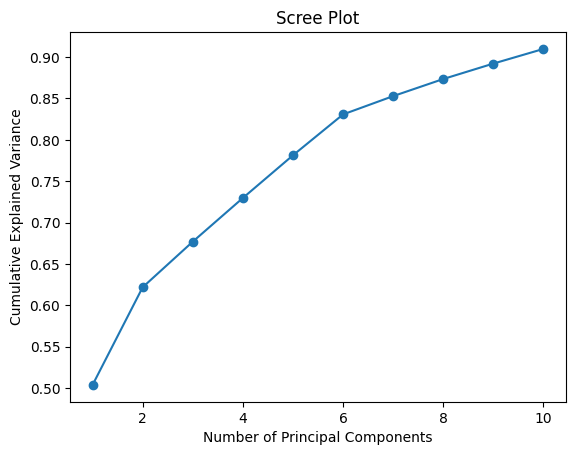

In [240]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

## Data Preprocessing

In [226]:
# X_train=train.drop(columns=['Cycle number', 'Engine id', 'Remaining_cycles'])
X_train = train[['Engine id','Cycle number','T24', 'T30', 'T50', 'P30', 'Nf', 'Ps30', 'phi', 'NRf', 'BPR', 'htBleed', 'W31', 'W32']]
# X_train=train[['Ps30', 'phi', 'T50', 'P30', 'BPR', 'W32', 'W31', 'NRf', 'Nf', 'T24',
#        'htBleed', 'T30', 'Nc', 'P15', 'NRc', 'Engine id',
#        'Operation Condition 1', 'Operation Condition 2',
#        'Operation Condition 3', 'T2', 'epr', 'P2', 'farB', 'Nf_dmd',
#        'PCNfR_dmd']]
y_train = train['Remaining_cycles']
# X_test=test.drop(columns=['Cycle number', 'Engine id', 'Remaining_cycles'])
X_test = test_f[['Engine id','Cycle number','T24', 'T30', 'T50', 'P30', 'Nf', 'Ps30', 'phi', 'NRf', 'BPR', 'htBleed', 'W31', 'W32']]
# X_test=test[['Ps30', 'phi', 'T50', 'P30', 'BPR', 'W32', 'W31', 'NRf', 'Nf', 'T24',
#        'htBleed', 'T30', 'Nc', 'P15', 'NRc', 'Engine id',
#        'Operation Condition 1', 'Operation Condition 2',
#        'Operation Condition 3', 'T2', 'epr', 'P2', 'farB', 'Nf_dmd',
#        'PCNfR_dmd']]
y_test = test_f['Remaining_cycles']

<Axes: >

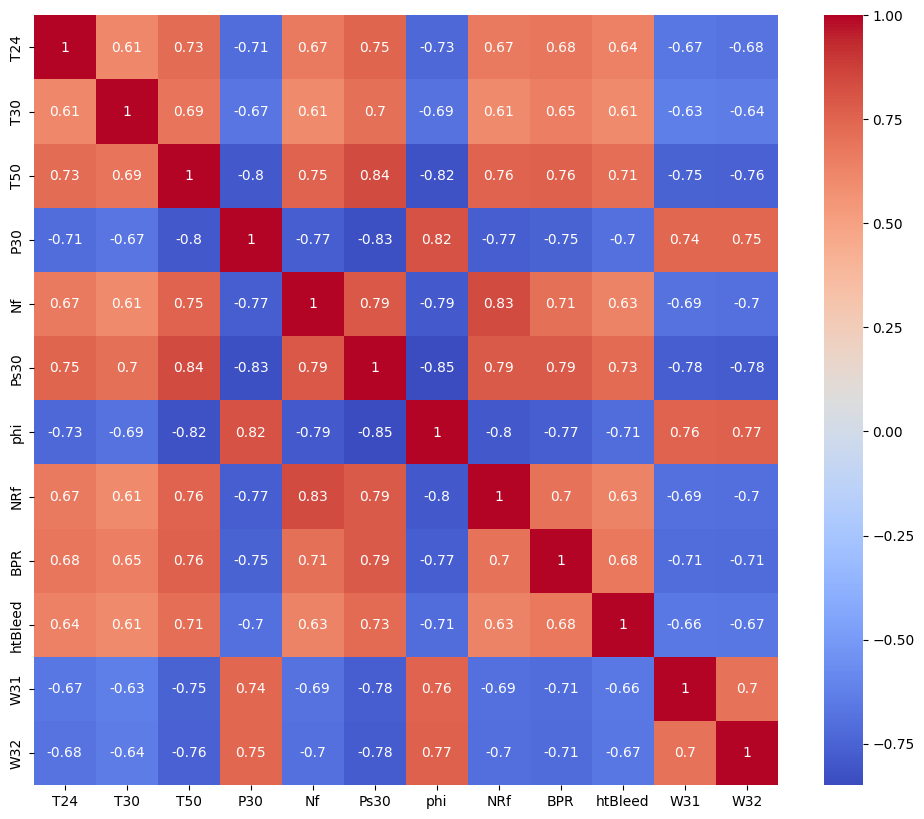

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(), 
            cmap='coolwarm', 
            annot=True
            )

<Axes: >

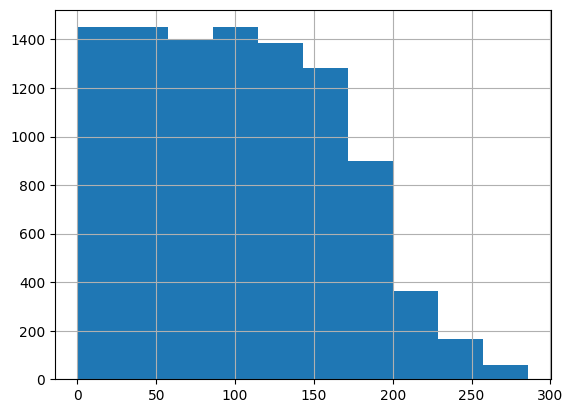

In [21]:
y_train.hist()

## Standard Scaler

In [65]:
# X_train_sc=StandardScaler().fit_transform(X_train)
# X_test_sc = StandardScaler().fit_transform(X_test)

In [227]:
def reshape_for_rnn(data, time_steps):
    samples, features = data.shape
    remaining_samples = time_steps-1

    padding = remaining_samples
    data = np.concatenate([np.zeros((padding, features)), data])
    
    samples, features = data.shape
    reshaped_data = np.zeros((samples - time_steps + 1, time_steps, features))

    for i in range(samples - time_steps + 1):
        reshaped_data[i] = data[i:i + time_steps]

    return reshaped_data


# time_step=10
# X_train_reshaped=reshape_for_rnn(X_train_sc, time_step)
# X_test_reshaped=reshape_for_rnn(X_test_sc, time_step)

In [241]:
# Alternative including engine id

time_steps=4
for i in X_train['Engine id'].unique():
    temp=X_train.query("`Engine id`==@i").drop(columns='Engine id')
    temp_sc = StandardScaler().fit_transform(temp)
    temp_rescaled = reshape_for_rnn(temp_sc, time_steps)
    if i==X_train['Engine id'].unique()[0]:
        X_train_reshaped=temp_rescaled
    else:
        X_train_reshaped= np.concatenate((X_train_reshaped, temp_rescaled))

for j in X_test['Engine id'].unique():
    tempt=X_test.query("`Engine id`==@j").drop(columns='Engine id')
    tempt_sc = StandardScaler().fit_transform(tempt)
    tempt_rescaled = reshape_for_rnn(tempt_sc, time_steps)
    if j==X_test['Engine id'].unique()[0]:
        X_test_reshaped=tempt_rescaled
    else:
        X_test_reshaped= np.concatenate((X_test_reshaped, tempt_rescaled))
    


# Models

## Deep Neural Net: RNN Regressor

In [26]:
import tensorflow as tf
import keras
from keras import layers

In [242]:
model = tf.keras.Sequential([
    layers.SimpleRNN(units = 75, 
                        # activation = tf.nn.relu,
                        return_sequences = True,
                        input_shape = (X_train_reshaped.shape[1],X_train_reshaped.shape[2])),
    # layers.Dropout(0.2),
    # layers.SimpleRNN(units = 100, 
    #                     activation = tf.nn.relu,
    #                     return_sequences = True
    #                     ),
    # layers.SimpleRNN(units = 100,
    #                     activation = "relu",
    #                     return_sequences = True
    #                     ),
    layers.SimpleRNN(units = 75),
    layers.Dense(1, activation='linear'
                #  activation=tf.nn.softmax
                 )
])

model.compile(optimizer= keras.optimizers.Adamax(learning_rate=0.001), 
              loss='mean_squared_error')

# model.compile(optimizer = keras.optimizers.legacy.SGD(learning_rate=0.0005,
#                                   decay=1e-7, 
#                                   momentum=0.9, 
#                                   nesterov=False
#                                   ), 
#                   loss = "mean_squared_error")

In [243]:
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test), )

Epoch 1/10
310/310 [==============================] - 1s 2ms/step - loss: 11147.5342 - val_loss: 20933.3027
Epoch 2/10
310/310 [==============================] - 0s 1ms/step - loss: 8168.2358 - val_loss: 16960.4570
Epoch 3/10
310/310 [==============================] - 0s 1ms/step - loss: 6217.0259 - val_loss: 13775.7988
Epoch 4/10
310/310 [==============================] - 0s 1ms/step - loss: 4613.3135 - val_loss: 11481.5811
Epoch 5/10
310/310 [==============================] - 0s 1ms/step - loss: 3334.2024 - val_loss: 9678.3711
Epoch 6/10
310/310 [==============================] - 0s 1ms/step - loss: 2390.0598 - val_loss: 8318.6680
Epoch 7/10
310/310 [==============================] - 0s 1ms/step - loss: 1740.6154 - val_loss: 7408.0068
Epoch 8/10
310/310 [==============================] - 0s 1ms/step - loss: 1283.0940 - val_loss: 6831.8403
Epoch 9/10
310/310 [==============================] - 0s 1ms/step - loss: 984.7066 - val_loss: 6303.3955
Epoch 10/10
310/310 [=====================

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3, 50)             3150      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 8251 (32.23 KB)
Trainable params: 8251 (32.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [126]:
pd.DataFrame({'y_pred':model.predict(X_test_reshaped).reshape(X_test.shape[0])})

201/201 [==============================] - 0s 429us/step


,y_pred
0,127.157021
1,136.336487
2,128.667603
3,139.697449
4,143.445526
...,...
6407,60.052929
6408,54.788616
6409,58.642883
6410,46.879787


## LSTM

In [244]:
lstm = tf.keras.Sequential([
    layers.LSTM(units=50, return_sequences=True, input_shape = (X_train_reshaped.shape[1],X_train_reshaped.shape[2])),
    # layers.LSTM(units=48, dropout=0.2, ),
    # layers.LSTM(units=48, return_sequences=True, go_backwards=True, recurrent_dropout=0.2),
    layers.LSTM(units=50),
    layers.Dense(1, 'linear')
])
lstm.compile(optimizer=keras.optimizers.Adamax(learning_rate=0.001), loss='mean_squared_error')

In [245]:
lstm.fit(X_train_reshaped, y_train, epochs=15, batch_size=32, validation_data=(X_test_reshaped, y_test), )

Epoch 1/15
310/310 [==============================] - 2s 3ms/step - loss: 12094.1572 - val_loss: 23080.9980
Epoch 2/15
310/310 [==============================] - 1s 2ms/step - loss: 9711.2715 - val_loss: 19862.6621
Epoch 3/15
310/310 [==============================] - 1s 2ms/step - loss: 7977.6680 - val_loss: 16959.4043
Epoch 4/15
310/310 [==============================] - 1s 2ms/step - loss: 6503.8071 - val_loss: 14560.2607
Epoch 5/15
310/310 [==============================] - 1s 2ms/step - loss: 5368.4819 - val_loss: 12778.7852
Epoch 6/15
310/310 [==============================] - 1s 2ms/step - loss: 4368.5332 - val_loss: 11131.7607
Epoch 7/15
310/310 [==============================] - 1s 2ms/step - loss: 3497.5808 - val_loss: 9900.8984
Epoch 8/15
310/310 [==============================] - 1s 2ms/step - loss: 2815.2253 - val_loss: 9159.7383
Epoch 9/15
310/310 [==============================] - 1s 2ms/step - loss: 2263.4045 - val_loss: 8448.5879
Epoch 10/15
310/310 [==================

In [225]:
pd.DataFrame({'y_pred':lstm.predict(X_test_reshaped).reshape(X_test.shape[0])})

201/201 [==============================] - 0s 439us/step


,y_pred
0,61.262009
1,58.577087
2,82.892372
3,108.474892
4,113.114014
...,...
6407,51.457397
6408,45.843140
6409,41.935883
6410,35.868507
